# IV - 0D computations

## 1. Knowledge of 0D computations

### Import statements

In [1]:
import sys
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt
from matplotlib import *

### Set the mechanism properties

In [2]:
gas = ct.Solution('gri30.yaml')
gas.TPX = 1000.0, ct.one_atm, {'CH4':1, 'O2':2, 'N2':7.52} 

### Create the reactor and the ReactorNet associated to it

In [3]:
# Create Reactor and fill with gas
r = ct.Reactor(gas)

# Prepare the simulation with a ReactorNet object
sim = ct.ReactorNet([r])
time = 8e-8

### Compute the reactor

In [20]:
# Arrays to hold the datas
n_points = 400
times = np.zeros(n_points)
data = np.zeros((n_points, 4))

# Advance the simulation in time
# and print the internal evolution of temperature, volume and internal energy
print(('%10s %10s' % ('t [s]', 'T [K]')))
for n in range(n_points):
    time += 8.e-3
    sim.advance(time)
    times[n] = time  # time in s
    data[n, 0] = r.T                               # set the temperature in the first column
    data[n, 1:] = r.thermo['O2', 'CO2', 'CH4'].X     # set the molar fractions in the other column
    print(('%10.3e %10.3f' % (sim.time, r.T)))

     t [s]      T [K]
 1.408e+00   2541.146
 1.416e+00   2541.146
 1.424e+00   2541.146
 1.432e+00   2541.146
 1.440e+00   2541.146
 1.448e+00   2541.146
 1.456e+00   2541.146
 1.464e+00   2541.146
 1.472e+00   2541.146
 1.480e+00   2541.146
 1.488e+00   2541.146
 1.496e+00   2541.146
 1.504e+00   2541.146
 1.512e+00   2541.146
 1.520e+00   2541.146
 1.528e+00   2541.146
 1.536e+00   2541.146
 1.544e+00   2541.146
 1.552e+00   2541.146
 1.560e+00   2541.146
 1.568e+00   2541.146
 1.576e+00   2541.146
 1.584e+00   2541.146
 1.592e+00   2541.146
 1.600e+00   2541.146
 1.608e+00   2541.146
 1.616e+00   2541.146
 1.624e+00   2541.146
 1.632e+00   2541.146
 1.640e+00   2541.146
 1.648e+00   2541.146
 1.656e+00   2541.146
 1.664e+00   2541.146
 1.672e+00   2541.146
 1.680e+00   2541.146
 1.688e+00   2541.146
 1.696e+00   2541.146
 1.704e+00   2541.146
 1.712e+00   2541.146
 1.720e+00   2541.146
 1.728e+00   2541.146
 1.736e+00   2541.146
 1.744e+00   2541.146
 1.752e+00   2541.146
 1.760e+00

### Plot results

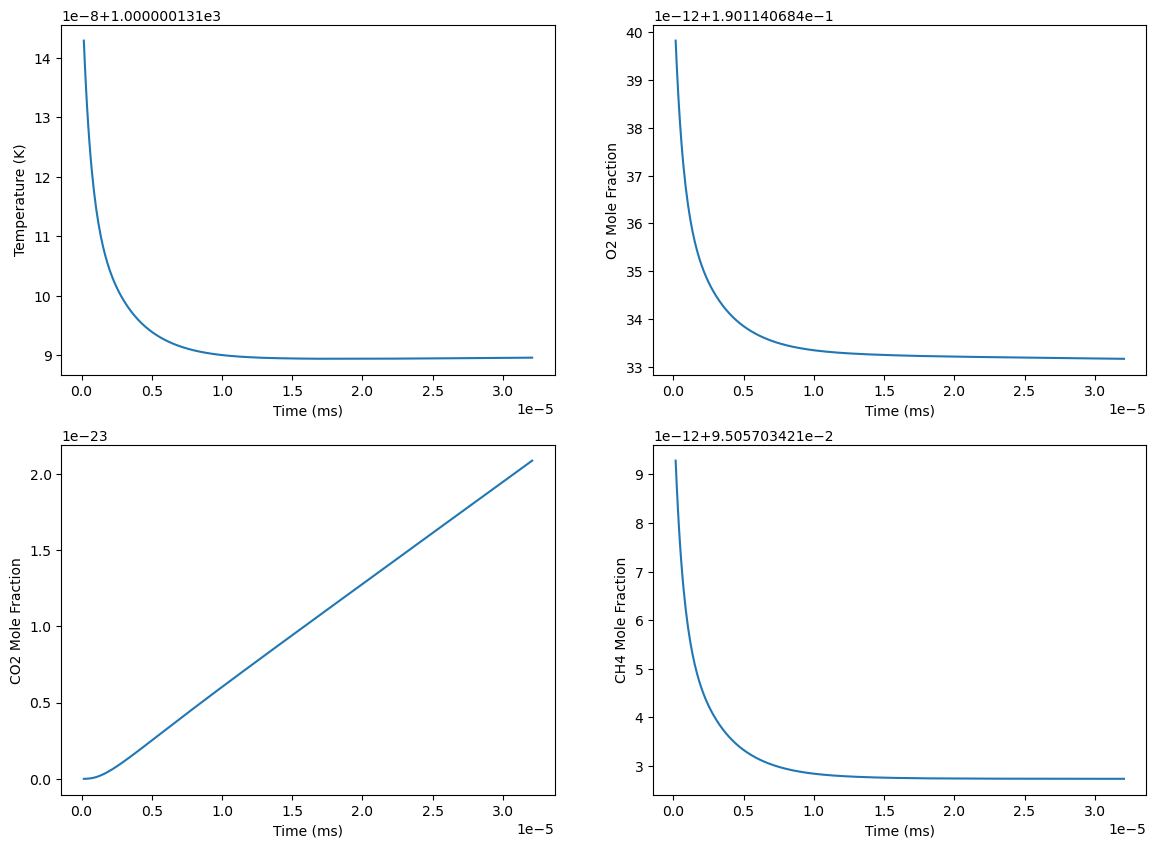

In [5]:
rcParams['figure.figsize'] = (14, 10)

plt.clf()

plt.subplot(2, 2, 1)
plt.plot(times, data[:, 0])
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(times, data[:, 1])
plt.xlabel('Time (ms)')
plt.ylabel('O2 Mole Fraction')

plt.subplot(2, 2, 3)
plt.plot(times, data[:, 2])
plt.xlabel('Time (ms)')
plt.ylabel('CO2 Mole Fraction')

plt.subplot(2, 2, 4)
plt.plot(times, data[:, 3])
plt.xlabel('Time (ms)')
plt.ylabel('CH4 Mole Fraction')

plt.show()

There are the characteristic evolutions that one can observe when simulating 0D cases. You should be aware that your case must auto-ignite (for some temperature, it is not sufficiently hot to auto-ignite, therefore nothing happens) and that the simulated time should be sufficient to capture the time where it ignites.

<div class="alert alert-danger "><b>Try to move the temperature of the gas state :<br>
- at 960 K<br>
- at 1040 K
<br><br>
What do you observe ?</b></div>

As you can see, slightly shifting the temperature up or down moves the auto-ignition time. As you never know a priori the order of magnitude of the ignition time, it is good to use the step version until you reach burnt gases.

## 3. A simple constant pressure reactor

Here, we want to create a simple constant pressure reactor. To do so, it is necessary to create a reactor and its environment (which will be a Reservoir). The interface between the two objects created is handled by a wall, of which the expansion rate can be defined by the user.

### Set the mechanism properties

In [6]:
# Mechanisms used for the process
gri3 = ct.Solution('gri30.xml')
air = ct.Solution('air.xml')

# Gas state
gri3.TPX = 1000.0, ct.one_atm, 'CH4:0.5,O2:1,N2:3.76'

C:\Users\Safari\AppData\Local\Temp\ipykernel_27300\959159443.py:2: DeprecationWarning: XML_Node::build: 
The CTI and XML input file formats are deprecated and will be removed in
Cantera 3.0. Use 'cti2yaml.py' or 'ctml2yaml.py' to convert CTI or XML input
files to the YAML format. See https://cantera.org/tutorials/legacy2yaml.html
for more information.
  gri3 = ct.Solution('gri30.xml')


### Set the reservoir

<div class="alert alert-danger "><b> Try to set :<br>
- an IdealGasReactor object with the gri3 object created above<br>
- a Reservoir representing the environment with the air object created above
</p></div>

In [7]:
# Reactor and environment
r = ct.IdealGasReactor(gri3)
env = ct.Reservoir(air)

# Wall
w = ct.Wall(r, env)
w.expansion_rate_coeff = 1.0e6  # set expansion parameter. dV/dt = KA(P_1 - P_2)
w.area = 1.0

# Prepare the simulation with a ReactorNet object
sim = ct.ReactorNet([r])
time = 4.e-1

As explained in the lecture, note that the environment defines the air in which the reactor is set in. We also define a wall between the reactor and the environment, and make it flexible, so that the pressure in the reactor is held at the environment pressure.

### Simulate the reactor

In [8]:
# Arrays to hold the datas
times = np.zeros(200)
data = np.zeros((200, 4))

# Advance the simulation in time
print(('%10s %10s %10s %14s' % ('t [s]', 'T [K]', 'P [Pa]', 'h [J/kg]')))
for n in range(200):
    time += 5.e-3
    sim.advance(time)
    times[n] = time  # time in s
    data[n, 0] = r.T
    data[n, 1:] = r.thermo['O2', 'CO2', 'CH4'].X
    print(('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T,
                                            r.thermo.P, r.thermo.h)))

     t [s]      T [K]     P [Pa]       h [J/kg]
 4.050e-01   1000.862 101325.000   5.879461e+05
 4.100e-01   1000.883 101325.000   5.879461e+05
 4.150e-01   1000.905 101325.000   5.879461e+05
 4.200e-01   1000.927 101325.000   5.879461e+05
 4.250e-01   1000.949 101325.000   5.879461e+05
 4.300e-01   1000.972 101325.000   5.879461e+05
 4.350e-01   1000.996 101325.000   5.879461e+05
 4.400e-01   1001.020 101325.000   5.879461e+05
 4.450e-01   1001.044 101325.000   5.879461e+05
 4.500e-01   1001.069 101325.000   5.879461e+05
 4.550e-01   1001.094 101325.000   5.879461e+05
 4.600e-01   1001.120 101325.000   5.879461e+05
 4.650e-01   1001.146 101325.000   5.879461e+05
 4.700e-01   1001.173 101325.000   5.879461e+05
 4.750e-01   1001.200 101325.000   5.879461e+05
 4.800e-01   1001.228 101325.000   5.879461e+05
 4.850e-01   1001.256 101325.000   5.879461e+05
 4.900e-01   1001.285 101325.000   5.879461e+05
 4.950e-01   1001.315 101325.000   5.879461e+05
 5.000e-01   1001.345 101325.000   5.879

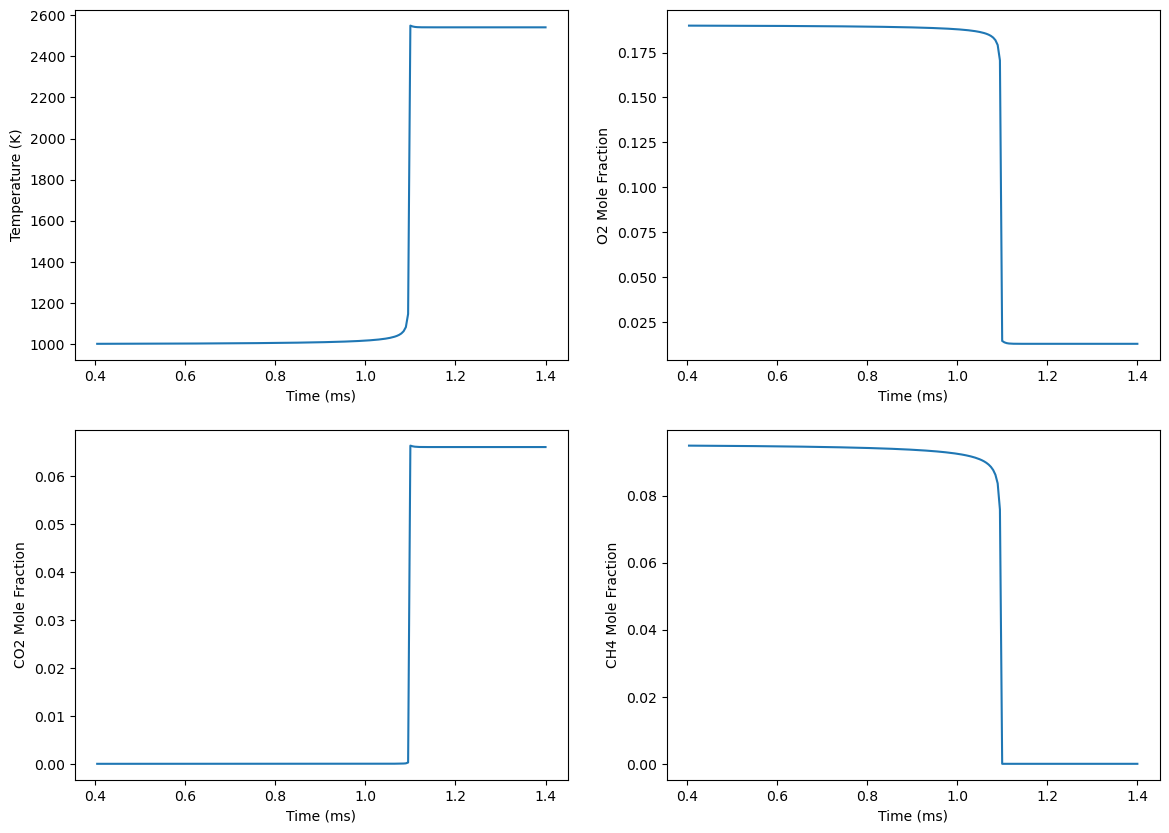

In [9]:
rcParams['figure.figsize'] = (14, 10)

plt.clf()

plt.subplot(2, 2, 1)
plt.plot(times, data[:, 0])
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(times, data[:, 1])
plt.xlabel('Time (ms)')
plt.ylabel('O2 Mole Fraction')

plt.subplot(2, 2, 3)
plt.plot(times, data[:, 2])
plt.xlabel('Time (ms)')
plt.ylabel('CO2 Mole Fraction')

plt.subplot(2, 2, 4)
plt.plot(times, data[:, 3])
plt.xlabel('Time (ms)')
plt.ylabel('CH4 Mole Fraction')

plt.show()

<div class="alert alert-danger "> Try to modify the script by creating an <b> IdealGasConstPressureReactor </b> instead of setting the environment into a reservoir to maintain the pressure.</div>

### Reset gas state and set the new IdealGasConstPressureReactor

In [10]:
# Mechanisms used for the process
gri3 = ct.Solution('gri30.xml')

# Gas state
gri3.TPX = 1000.0, ct.one_atm, 'CH4:0.5,O2:1,N2:3.76'

r = ct.IdealGasConstPressureReactor(gri3)

# Prepare the simulation with a ReactorNet object
sim = ct.ReactorNet([r])
time = 4.e-1

### Simulate the new case

In [11]:
# Arrays to hold the datas
times = np.zeros(200)
data = np.zeros((200, 4))

# Advance the simulation in time
print(('%10s %10s %10s %14s' % ('t [s]', 'T [K]', 'P [Pa]', 'h [J/kg]')))
for n in range(200):
    time += 5.e-3
    sim.advance(time)
    times[n] = time  # time in s
    data[n, 0] = r.T
    data[n, 1:] = r.thermo['O2', 'CO2', 'CH4'].X
    print(('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T,
                                            r.thermo.P, r.thermo.h)))

     t [s]      T [K]     P [Pa]       h [J/kg]
 4.050e-01   1000.862 101325.000   5.879464e+05
 4.100e-01   1000.883 101325.000   5.879464e+05
 4.150e-01   1000.905 101325.000   5.879464e+05
 4.200e-01   1000.927 101325.000   5.879464e+05
 4.250e-01   1000.950 101325.000   5.879464e+05
 4.300e-01   1000.973 101325.000   5.879464e+05
 4.350e-01   1000.996 101325.000   5.879464e+05
 4.400e-01   1001.020 101325.000   5.879464e+05
 4.450e-01   1001.044 101325.000   5.879464e+05
 4.500e-01   1001.069 101325.000   5.879464e+05
 4.550e-01   1001.094 101325.000   5.879464e+05
 4.600e-01   1001.120 101325.000   5.879464e+05
 4.650e-01   1001.146 101325.000   5.879464e+05
 4.700e-01   1001.173 101325.000   5.879464e+05
 4.750e-01   1001.201 101325.000   5.879464e+05
 4.800e-01   1001.228 101325.000   5.879464e+05
 4.850e-01   1001.257 101325.000   5.879464e+05
 4.900e-01   1001.286 101325.000   5.879464e+05
 4.950e-01   1001.315 101325.000   5.879464e+05
 5.000e-01   1001.345 101325.000   5.879

### Plot the results and compare with the previous one

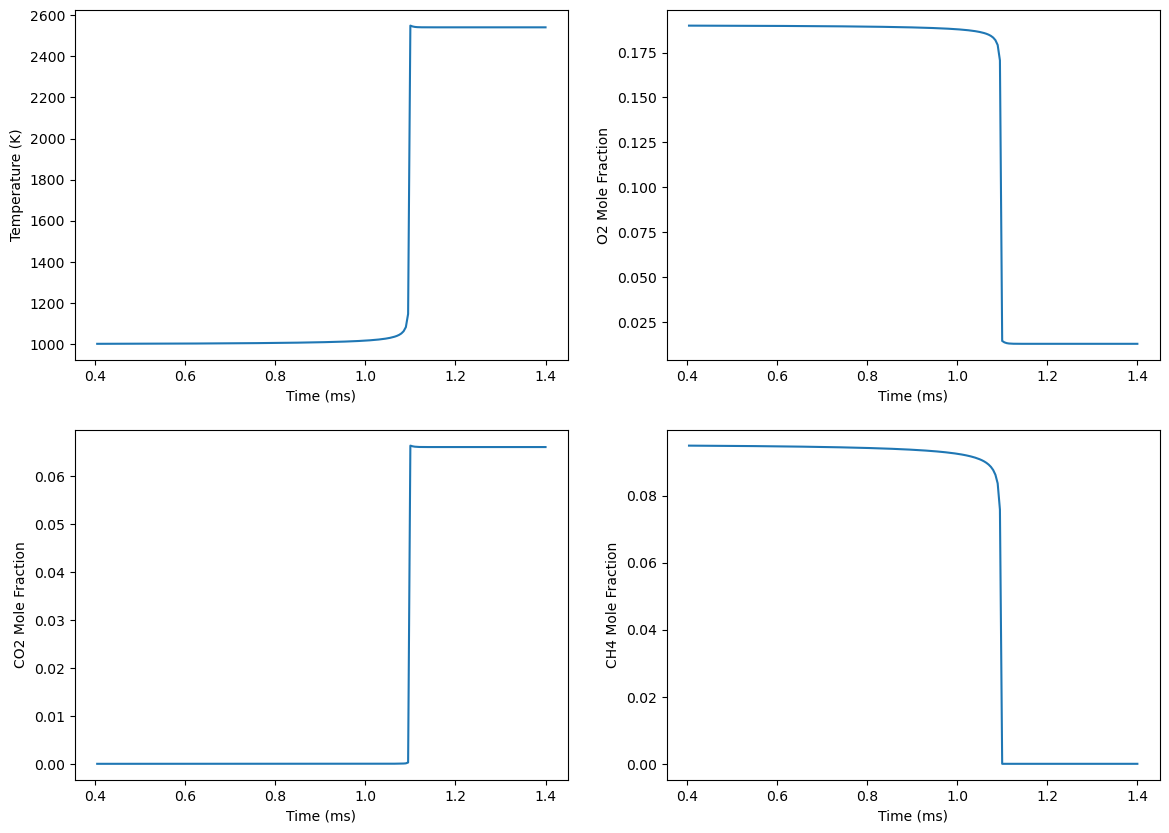

In [12]:
rcParams['figure.figsize'] = (14, 10)

plt.clf()

plt.subplot(2, 2, 1)
plt.plot(times, data[:, 0])
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(times, data[:, 1])
plt.xlabel('Time (ms)')
plt.ylabel('O2 Mole Fraction')

plt.subplot(2, 2, 3)
plt.plot(times, data[:, 2])
plt.xlabel('Time (ms)')
plt.ylabel('CO2 Mole Fraction')

plt.subplot(2, 2, 4)
plt.plot(times, data[:, 3])
plt.xlabel('Time (ms)')
plt.ylabel('CH4 Mole Fraction')

plt.show()

## 4. An example of application : mixing two streams

Up until now, we have seen how to generate simple closed vessels. However, it is sometimes interesting
to mix different streams, or to feed the exhaust of a reservoir with constant parameters to a reacting
reactor. In this exercise, we will design a script that simulates the stoichiometric constant volume
mixing of a stream of air with a stream of pure gaseous methane.

![title](Images/Scheme.png)

### Set the two gases and the molar mass associated

<div class="alert alert-danger "><b> You will have to :<br>
- set a first gas a with an air mixture at 0.21 of O2, 0.01 of AR and 0.78 of N2<br>
- set a second gas b with a gri30 mixture at 1 of CH4
<b></div>

In [13]:
gas_a = ct.Solution('air.xml')
gas_a.TPX = 300, ct.one_atm, 'O2:0.21, N2:0.78, AR:0.01'
mw_a = gas_a.mean_molecular_weight/1000 #kg/mol

gas_b = ct.Solution('gri30.xml')
gas_b.TPX = 300.0, ct.one_atm, 'CH4:1'
mw_b = gas_b.mean_molecular_weight/1000 #kg/mol

### Creation of two reservoirs and an exhaust one (ReactorBase)

<div class="alert alert-danger "><b> You will have to :<br>
- set a first reservoir from gas a<br>
- set a second reservoir from gas b<br>
- set a downstream reservoir filled with gas b
<b></div>

In [14]:
res_a = ct.Reservoir(gas_a)
res_b = ct.Reservoir(gas_b)
downstream = ct.Reservoir(gas_b)

### Generate the reactor that will receive the mixed stream (ReactorBase)

<div class="alert alert-danger "><b> You will have to :<br>
- change the condition of the gas b to respect an air mix.<br>
- create and IdealGasReactor with the energy equation set to 'on'.
<b></div>

In [15]:
gas_b.TPX = 300, ct.one_atm, 'O2:1., N2:3.78, CH4:0.5'
mixer = ct.IdealGasReactor(gas_b, energy='on')

Watch out here, the mixture should be the one of gas_b, as the reactions will occur with the mechanism from gri30 (and not from the air).

### Creation of the mass flow controller that will control the mixing (FlowDevice)

Now that you have specified all the elements of the reactor, you need to detail the link between them. This is what is done in the following lines :

In [16]:
mfca = ct.MassFlowController(res_a, mixer, mdot=mw_a*2./0.21)
mfcb = ct.MassFlowController(res_b, mixer, mdot=mw_b*1.0)

### Creation of the valve between the mixer and the downstream (FlowDevice)

Finally, the valve is created.

In [17]:
outlet = ct.Valve(mixer, downstream, K=10.0)

This valve will enable the system to keep a constant pressure at the inlet of the mixer and at the outlet.

### Creation of the net reactor to compute simulation

<div class="alert alert-danger "><b> You need to create the ReactorNet with the mixer. <b></div>

In [18]:
sim = ct.ReactorNet([mixer])

In [19]:
# Since the mixer is a reactor, we need to integrate in time to reach steady
# state. A few residence times should be enough.
print('{0:>14s} {1:>14s} {2:>14s} {3:>14s} {4:>14s}'.format('t [s]', 'T [K]', 'h [J/kg]', 'P [Pa]', 'X_CH4'))
t = 0.0
for n in range(100):
    tres = mixer.mass/(mfca.mdot(t) + mfcb.mdot(t))
    t += 2*tres
    sim.advance(t)
    print('{0:14.5g} {1:14.5g} {2:14.5g} {3:14.5g} {4:14.5g}'.format(t, mixer.T, mixer.thermo.h, mixer.thermo.P, mixer.thermo['CH4'].X[0]))

print(mixer.thermo.report())

         t [s]          T [K]       h [J/kg]         P [Pa]          X_CH4


AttributeError: 'cantera._cantera.MassFlowController' object has no attribute 'mdot'

Notice that the gas did not ignite, and that the composition is indeed stoichiometric. We could trigger
the ignition, by assuming that the reactor is 'already lit'. To do so, you need to initialize the content
of the reactor with hot gases. The simplest way to do so is by filling it with stoichiometric mixture of
air and methane at equilibrium. This is easily done by replacing the lines :<br>
<code>
gas_b.TPX = 300.0, ct.one_atm, 'O2:0.21, N2:0.78, AR:0.01'
mixer = ct.IdealGasReactor(gas_b)
</code><br>
with :
<br><code>
gas_b.TPX = 300.0,ct.one_atm,'O2:1., N2:3.78, CH4:0.5'
gas_b.equilibrate("HP")
mixer = ct.IdealGasReactor(gas_b)
</code>

## 5. Autoignition timing

An interesting feature of 0D simulations is that it allows to compute the temporal evolution of a
mixture under specific conditions towards its equilibrium state. That evolution can be viewed as
a sort of **autoignition** of the mixture.<br>
To go further, that last exercise will guide you through
such a computation of the autoignition timing of a methane/air mixture. Several definitions of the
autoignition timing can be found in the literature. The most commonly accepted definition relies
on the temperature gradient : the time of the sharpest temperature increase is spotted as being the
autoignition point. In order to catch this time with precision, the time step of the simulation should
be as small as possible.

### Create the gas object

In [ ]:
gas = ct.Solution('gri30.yaml')
gas.TPX = 1250, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'

### Initialisation of the different values

In [ ]:
# Initial temperatures
Temperature_range = list(range(800, 1700, 100))

# Specify the number of time steps and the time step size
nt = 100000
dt = 1.e-4  # s

# Storing auto ignitions
auto_ignitions = []

In [ ]:
for index, Temperature in enumerate(Temperature_range):
    #################################################################
    # Initial temperature, Pressure and stoichiometry
    gas.TPX = Temperature, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'
    # Create the batch reactor
    r = ct.IdealGasReactor(gas)
    # Now create a reactor network consisting of the single batch reactor
    sim = ct.ReactorNet([r])
    # Storage space
    mfrac = []
    # ...
    time = []
    temperature = []
    HR = []
    # Run the simulation
    # Initial simulation time
    current_time = 0.0
    # Loop for nt time steps of dt seconds.
    for n in range(nt):
        current_time += dt
        sim.advance(current_time)
        time.append(current_time)
        temperature.append(r.T)
        mfrac.append(r.thermo.Y)
        HR.append(- np.dot(gas.net_production_rates, gas.partial_molar_enthalpies))
    #################################################################
    # Catch the autoignition timing
    #################################################################
    # Get the ignition delay time by the maximum value of the Heat Release rate
    auto_ignition = time[HR.index(max(HR))]
    print('For T = ' + str(Temperature) + ', Autoignition time = ' + str(auto_ignition) + ' s')
    # Posterity
    FinalTemp = temperature[nt - 1]
    auto_ignitions.append(auto_ignition)
    # #################################################################
    # # Save results
    # #################################################################
    # # write output CSV file for importing into Excel
    # csv_file = '3-Output/Phi-1_P-1_T-' + str(Temperature) + '_UV.csv'
    # with open(csv_file, 'w') as outfile:
    # writer = csv.writer(outfile)
    # writer.writerow(['Auto ignition time [s]', 'Final Temperature [K]'] + gas.species_names)
    # writer.writerow([auto_ignition, FinalTemp] + list(mfrac[:]))
    # print('output written to ' + csv_file)
T_invert = [1000 / Temperature for Temperature in Temperature_range]

In [ ]:
#################################################################
# Plot results
#################################################################
# create plot
plt.plot(Temperature_range, auto_ignitions, 'b-o')
plt.xlabel(r'Temperature [K]', fontsize=20)
plt.ylabel("Auto ignition [s]", fontsize=20)
plt.yscale('log')
plt.title(r'Autoignition of $CH_{4}$ + Air mixture at $\Phi$ = 1, and P = 1 bar',
fontsize=22, horizontalalignment='center')
plt.axis(fontsize=20)
plt.grid()
plt.show()

This is a typical curve of the auto-ignition time as a function of the initial temperature, meaning that when the temperature increases, this time is reduced.